In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [12, 10]

In [140]:
listings = pd.read_csv('listings.csv')

# 1. Column analysis

In [137]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14667 entries, 0 to 14666
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   __type                14667 non-null  object 
 1   MlsNumber             14667 non-null  int64  
 2   CategoryCode          14667 non-null  object 
 3   Lat                   14667 non-null  float64
 4   Lng                   14667 non-null  float64
 5   Address               14667 non-null  object 
 6   City                  14667 non-null  object 
 7   Quartier              11488 non-null  object 
 8   ShortCity             14667 non-null  object 
 9   PostalCode            14667 non-null  object 
 10  ShortDescription      0 non-null      float64
 11  LongDescription       12922 non-null  object 
 12  PhotoText             14667 non-null  object 
 13  BuyPrice              14667 non-null  object 
 14  BuyPriceDesc          2811 non-null   object 
 15  LocationPrice      

## 1.1. Columns description
- `__type` - ?
- `MlsNumber` - probably id,
- `CategoryCode` - 'COP', 'PPR', 'PCI', 'UNI', 'TER', 'FER'
    COP: AP (Apartment), LS (Loft/Studio), MA (Condo/Loft, House) -- Townhouse
    FER: FE (Farm)
    PCI: C (Commercial), I (Industrial), VE (Bulk, block sale)
    PPR: 2X (Duplex), 3X (Triplex), 4X (Quadruplex), 5X (Quintuplex), AU (Revenue Property)
    TER: TE, TR (Land) 
    UNI: ME/MEM (Single family, 2 or more storeys), MM (Single family, mobile home), MPM (Single family, split level), PP (single family, bungalow)
- `Lat` - latitude,
- `Lng` - longitude,
- `Adress`
- `City` - 33 different cities
- `Quartier` - 52 different districts
- `ShortDescription` - column to drop, contains only NULLS
- `LongDescription` - description od the property(in french or in english)
- `BuyPrice` - buy price in dollars
- `BuyPriceDesc` - '+GST/QST': - goods and services tax (GST) and the Québec sales tax (QST),
    '/square foot', ' /square foot +GST/QST'
- `LocationPrice` - maybe additional price for location,
- `LocationPriceDesc` -  /month', ' /year', ' /month +GST/QST',
       ' /year /square foot +GST/QST', ' /year +GST/QST,
- `Category` - type of building, full category name,
- `Construction` - year of construction,
- `OpenHouse` - probably the open hours when you can come to see the house on sale,
- `GenreCode` - ???,
- `CatgCode` - duplicate of column `CategoryCode`,
- `Utilisation` - mostly nan, other categories: 'Residential only', 'Commercial and residential',
       'Industrial and offices', 'Residential and commercial',
       'Commercial and office space', 'Commercial and industrial',
       'Commercial only', 'Commercial or industrial (income)',
       'Multi-family dwelling', 'Offices only', 'Industrial only',
       'Other', 'Retirement home',
       
- `RevenuEffectif` - column to drop, contains only zeros,
- `RevenueBrutPotentiel` - Gross potential income (GPI) refers to the total rental income a property can produce if all units were fully leased and rented at market rents with a zero vacancy rate,
- `WalkScore` -
    | Score  | Description |
    |---|--:|
    | 90–100	Walker's Paradise  | Daily errands do not require a car. |
    | 70–89	Very Walkable | Most errands can be accomplished on foot. |
    | 50–69	Somewhat Walkable | Some errands can be accomplished on foot. |
    | 25–49	Car-Dependent | Most errands require a car. |
    | 0–24	Car-Dependent | Almost all errands require a car. |
- `SuperficieTerrain` - column to drop, contains only zeros,
- `NbPieces` - number of rooms,
- `NbChambers` - number of bedrooms,
- `NbSallesEaux` - number of bathrooms with shower,
- `NbSallesBains` - number of bathrooms with bathtub,
- `NbFoyerPoele` - number of fireplaces,
- `NbEquipements` - column to drop, contains only zeros,
- `NbGarages` - number of garages,
- `NbStationnements` - number of parking lots,
- `NbPiscines` - number  of pools,
- `NbBordEaux` - ???,
- `NbAnimals` - column to drop, contains only zeros,
- `NbCultures` - ???, value 1 for only 1 observation,
- `Langue` - column to drop, contains only nulls

# 2. Numeric columns
Columns to drop: `MlsNumber`, `RevenueEffective`, `ShortDescription`, `Langue`, `SuperficieTerrain`, `NbEquipements`, `NbAnimals`, `NbCultures`.
Columns to convert to numeric: `BuyPrice`, `Construction`.

`LocationPrice` probably to drop because contains mainly NaNs.

## 2.1. Convert to numeric
`BuyPrice` and `Construction`

In [141]:
print(listings.BuyPrice)
listings.BuyPrice = listings.BuyPrice.apply(lambda x: float(x.replace('$', '').replace(',', '')))

0          $187,500
1          $574,900
2          $475,000
3          $545,000
4          $200,000
            ...    
14662      $760,000
14663    $1,295,000
14664    $1,450,000
14665    $2,268,000
14666    $1,950,000
Name: BuyPrice, Length: 14667, dtype: object


### `Construction`
There are some null values. Probably we can fill the missing values with the year of build of the closest building.

In [142]:
print(listings.Construction)
listings.Construction[listings.Construction.isna()] = '0'
listings.Construction = listings.Construction.apply(lambda x: int(x.replace('Construction', '')))
listings.Construction

0        Construction 1988
1        Construction 1955
2        Construction 1959
3                      NaN
4        Construction 2011
               ...        
14662                  NaN
14663    Construction 1909
14664    Construction 1989
14665    Construction 1914
14666    Construction 1939
Name: Construction, Length: 14667, dtype: object


C:\Users\marys\AppData\Local\Temp/ipykernel_21012/3307661108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.Construction[listings.Construction.isna()] = '0'


0        1988
1        1955
2        1959
3           0
4        2011
         ... 
14662       0
14663    1909
14664    1989
14665    1914
14666    1939
Name: Construction, Length: 14667, dtype: int64

In [143]:
def closest_neighbour_construction_year(lat, lng, df):
    df = df.reset_index()
    return df.Construction[np.argmin(np.sqrt(np.square(lat - df.Lat) + np.square(lng - df.Lng)))]

In [144]:
listings.Construction[listings.Construction == 0] = listings[listings.Construction == 0] \
    .apply(lambda row: closest_neighbour_construction_year(row.Lat, row.Lng, listings[listings.Construction != 0]), axis=1)


C:\Users\marys\AppData\Local\Temp/ipykernel_21012/211395027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.Construction[listings.Construction == 0] = listings[listings.Construction == 0] \


## 2.2. Analyse `BuyPrice` 

In [146]:
listings.describe().BuyPrice

count    1.466700e+04
mean     5.308267e+05
std      6.094078e+05
min      3.600000e+00
25%      2.690000e+05
50%      3.800000e+05
75%      5.690000e+05
max      1.388000e+07
Name: BuyPrice, dtype: float64

In [150]:
upper_price_limit =  3 * 10**6
lower_price_limit = 10 ** 4
print(np.sum((listings.BuyPrice < upper_price_limit) & (lower_price_limit < listings.BuyPrice)))
limited_listings = listings[(listings.BuyPrice < upper_price_limit) & (lower_price_limit < listings.BuyPrice)]

14494


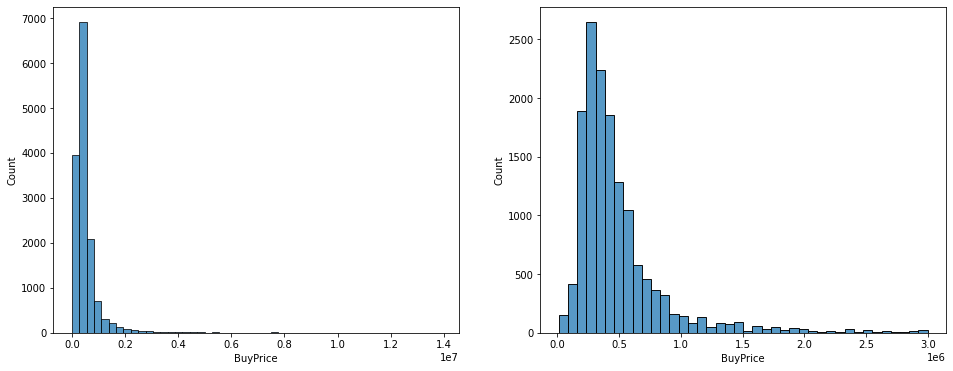

In [151]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(listings, x='BuyPrice', bins=50)
plt.subplot(1, 2, 2)
sns.histplot(limited_listings, x='BuyPrice', bins=40)
plt.show()

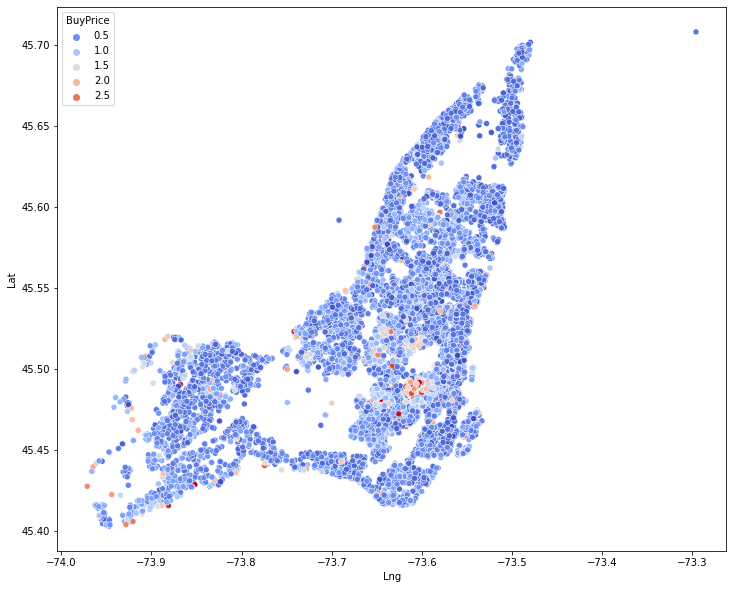

In [152]:
sns.scatterplot(data=limited_listings, x='Lng', y='Lat', hue='BuyPrice', palette=sns.color_palette("coolwarm", as_cmap=True))
plt.show()

## 2.1 Correlation matrix

In [153]:
numeric_df = listings.select_dtypes(include=['int', 'float'])
numeric_df = numeric_df.drop(columns=['MlsNumber', 'RevenuEffectif', 
                                                'ShortDescription', 'Langue', 'SuperficieTerrain',
                                                'NbEquipements', 'NbAnimals', 'NbCultures'])
numeric_df

,Lat,Lng,BuyPrice,Construction,RevenuBrutPotentiel,WalkScore,NbPieces,NbChambres,NbSallesEaux,NbSallesBains,NbFoyerPoele,NbGarages,NbStationnements,NbPiscines,NbBordEaux
0,45.556508,-73.633198,187500.0,1988,0,60,5,1,0,1,0,0,1,0,0
1,45.542062,-73.696868,574900.0,1955,26760,75,11,4,0,1,0,0,1,0,0
2,45.573887,-73.649079,475000.0,1959,0,88,0,0,0,0,0,0,1,0,0
3,45.571040,-73.643413,545000.0,1956,22800,84,6,2,0,1,0,0,0,0,0
4,45.533876,-73.672649,200000.0,2011,0,63,6,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14662,45.481498,-73.591471,760000.0,1986,0,85,7,3,1,2,0,0,0,0,0
14663,45.479493,-73.600415,1295000.0,1909,0,97,13,5,2,3,2,2,2,0,0
14664,45.488253,-73.587413,1450000.0,1989,0,99,7,3,1,2,0,2,1,5,0
14665,45.487523,-73.608672,2268000.0,1914,0,46,12,6,1,5,1,2,2,0,0


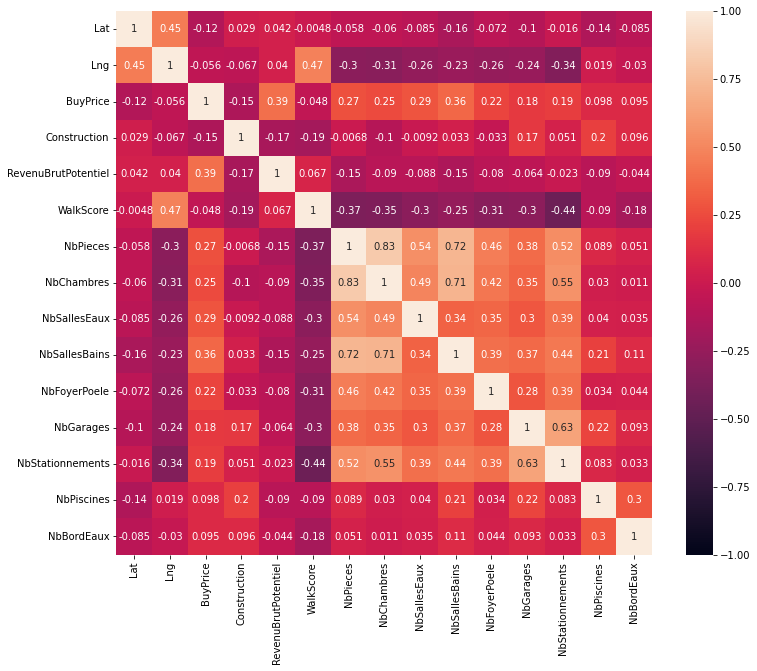

In [154]:
sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

1. `BuyPrice` is mostly correlated with gross potential income, number of bathrooms, bedrooms and rooms.

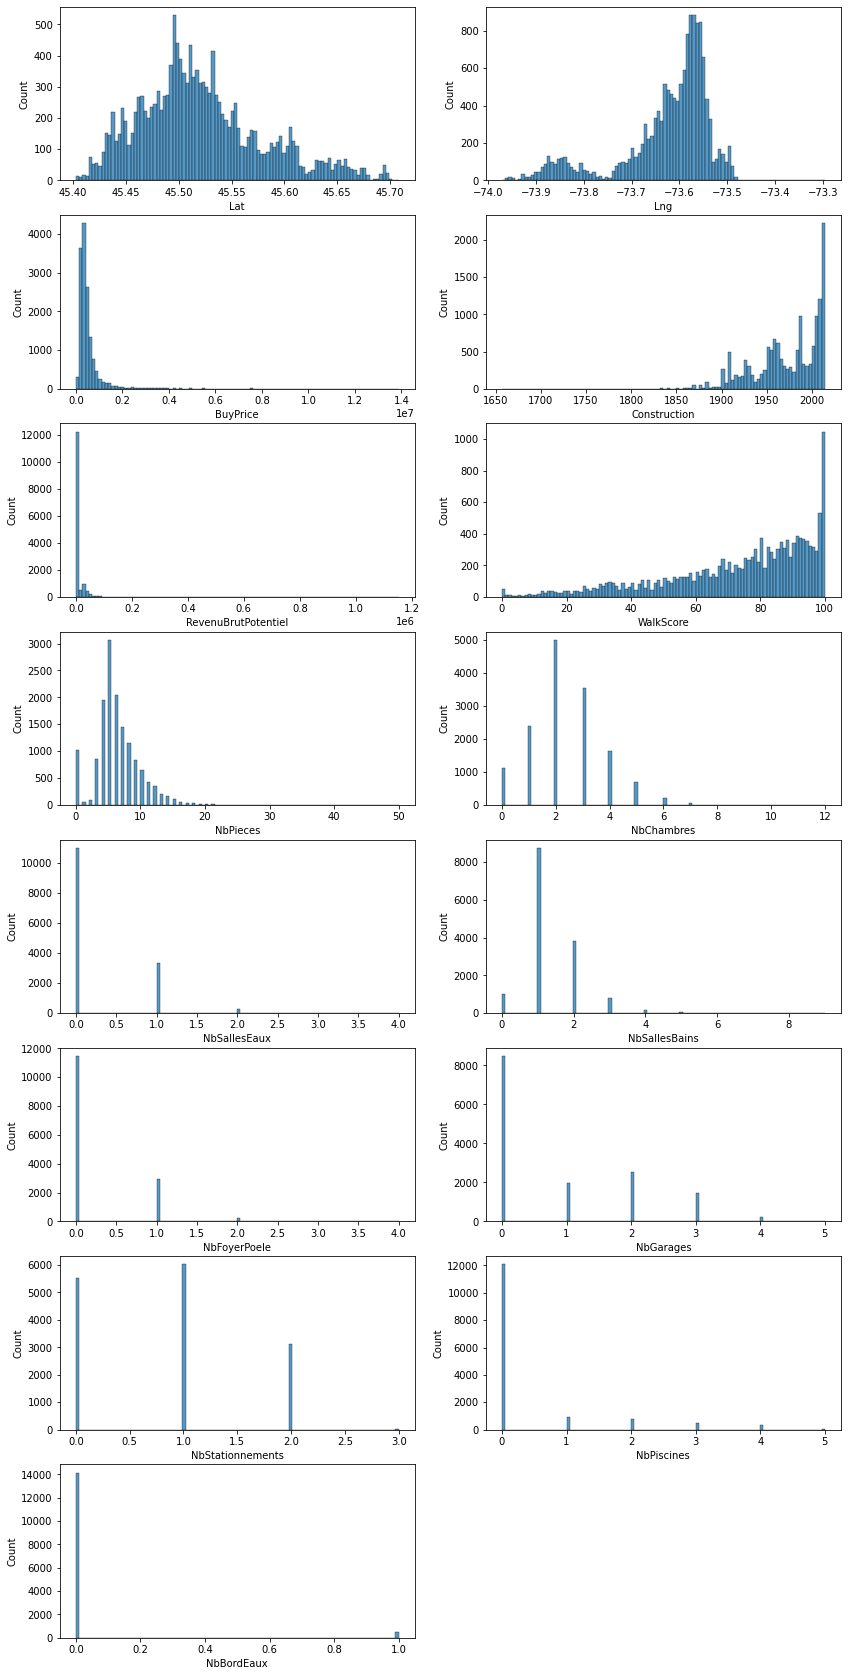

In [155]:
plt.figure(figsize=[14, 30])
for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns)//2 + 1, 2, i+1)
    sns.histplot(listings, x=column, bins=100)

## 2.2. Categorical columns
Columns to drop: `CatgCode` (duplicate of `CategoryCode`), `DiffusionWebUrl`, `PhotoUrl`,
       `PhotoPrintingUrl`, `FinancialToolUrl`, `PasserelleUrl`, `CommunityUrl`,
       `GoogleStreetViewUrl`, `WalkScoreUrl`, 
       `ShareThisUrl`, `SummaryUrl`, `PrintingPageUrl`, `GoogleMapAddressLink`
       
Column to convert to boolean: `VisiteVirtuelleUrl`.

Columns to analyse as text data: `PageTitle`, `LongDescription`, `PhotoText`.

In [11]:
categorical_columns = listings.select_dtypes(include=['object', 'string'])
categorical_columns = categorical_columns.drop(columns=['CatgCode', 'DiffusionWebUrl', 'PhotoUrl',
       'PhotoPrintingUrl', 'FinancialToolUrl', 'PasserelleUrl', 'CommunityUrl',
       'GoogleStreetViewUrl', 'WalkScoreUrl', 'VisiteVirtuelleUrl',
       'ShareThisUrl', 'SummaryUrl', 'PrintingPageUrl', 'PageTitle',
       'GoogleMapAddressLink', 'LongDescription', 'PhotoText', 'PostalCode', '__type', 'Address', 'City', 'LocationPrice',
                                                       'Category'])
categorical_columns.columns

Index(['CategoryCode', 'Quartier', 'ShortCity', 'BuyPriceDesc',
       'LocationPriceDesc', 'OpenHouse', 'GenreCode', 'Utilisation'],
      dtype='object')

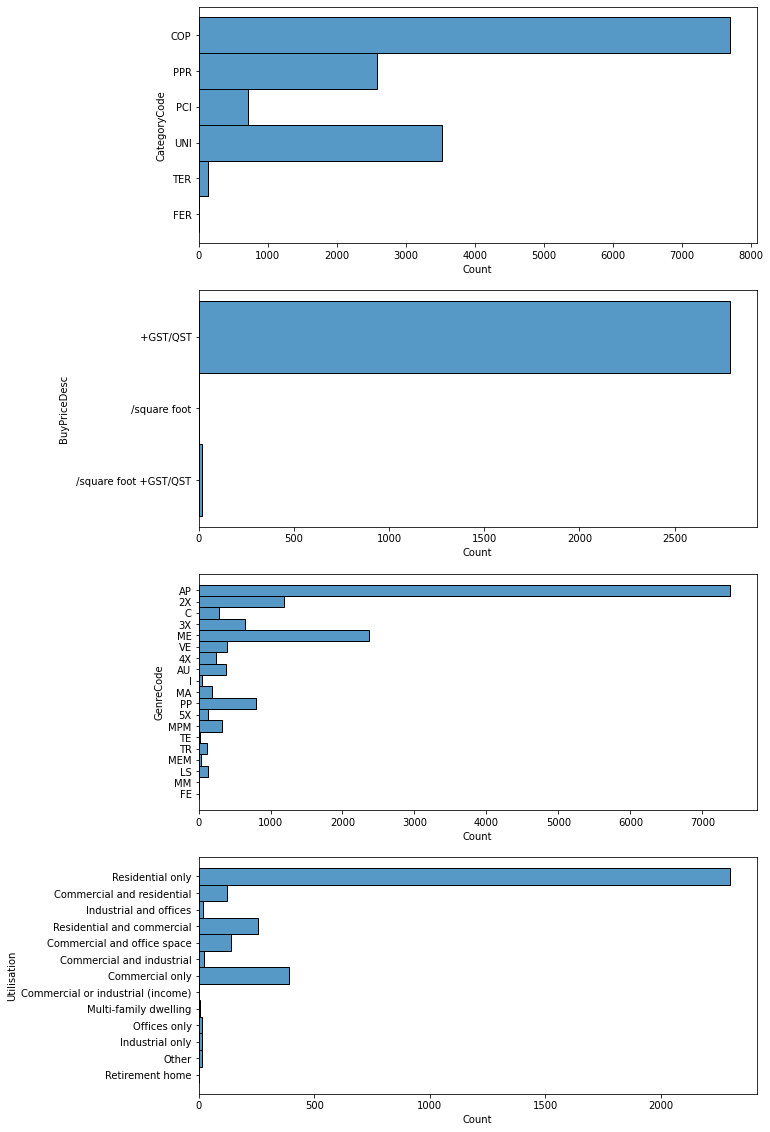

In [12]:
plt.figure(figsize=[10, 20])
categorical_columns_1 = ['CategoryCode', 'BuyPriceDesc', 'GenreCode', 'Utilisation']
for i, column in enumerate(categorical_columns_1):
    plt.subplot(len(categorical_columns_1), 1, i+1)
    sns.histplot(listings, y=column)

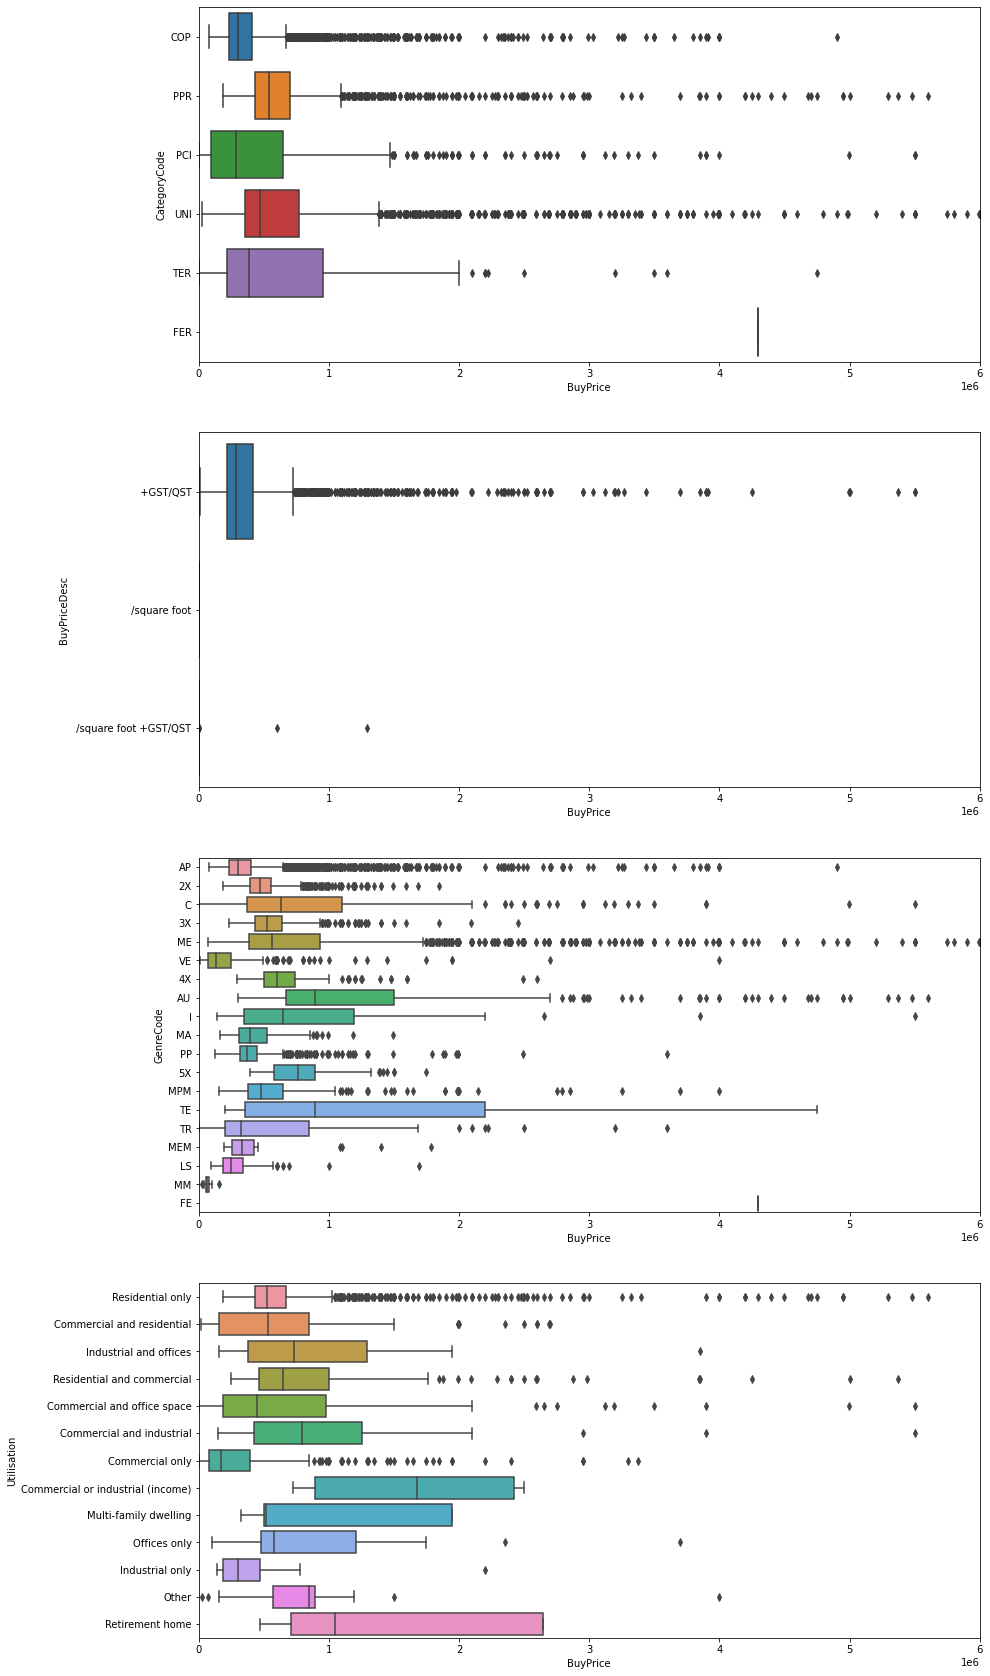

In [32]:
plt.figure(figsize=[14, 30])
for i, column in enumerate(categorical_columns_1):
    plt.subplot(len(categorical_columns_1), 1, i+1)
    sns.boxplot(data=listings, y=column, x='BuyPrice')
    plt.xlim((0, 6*10**6))

In [103]:
print(listings.BuyPriceDesc.count())
listings.groupby(['BuyPriceDesc']).count().BuyPrice

2811


BuyPriceDesc
 +GST/QST                 2791
 /square foot                3
 /square foot +GST/QST      17
Name: BuyPrice, dtype: int64

**Conclusions**
1. `CategoryCode` - Most expensive are positions from categories: PPR amd UNI.
2. 
4. `Utilisation` - connect 'Commercial and residential'  and 'Residential and commercial' into one.

## 2.3 Boolean columns
Columns to drop: `IsFavorite`, `IsRemoved`, `IsSubject`, `IsStrictQueryMatch`, `IsFavoriteDisplayed`, `IsRemovedDisplayed`, `IsEmptyView`, `IsMissingView`, `IsInFavorite`.

These columns contain only `False` values.

In [50]:
boolean_columns = ['IsNewPrice', 'IsNew']

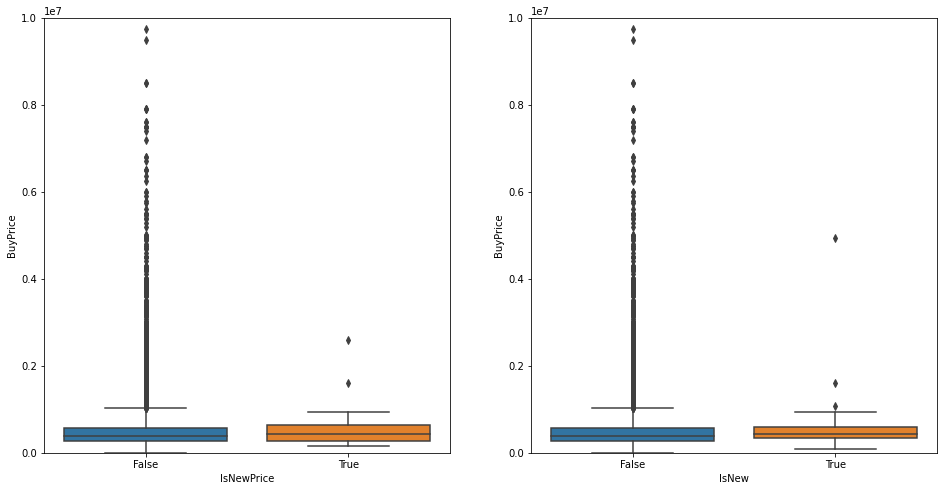

In [58]:
priceLimit =  10**7

plt.figure(figsize=[16,8])
for i, column in enumerate(boolean_columns):
    plt.subplot(1, len(boolean_columns), i+1)
    sns.boxplot(data=listings, y='BuyPrice', x=column)
    plt.ylim((0, priceLimit))

**Conclusions**
It looks as if `IsNewPrice` and `IsNew` wre not important for price prediction.
`OpenHouse` to boolean